In [89]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [90]:
df = pd.read_csv('D:\\Retail Business\\retail_store_sales.csv')

In [91]:
df.head()

,Transaction ID,Customer ID,Category,Item,Price Per Unit,Quantity,Total Spent,Payment Method,Location,Transaction Date,Discount Applied
0,TXN_6867343,CUST_09,Patisserie,Item_10_PAT,18.5,10.0,185.0,Digital Wallet,Online,2024-04-08,True
1,TXN_3731986,CUST_22,Milk Products,Item_17_MILK,29.0,9.0,261.0,Digital Wallet,Online,2023-07-23,True
2,TXN_9303719,CUST_02,Butchers,Item_12_BUT,21.5,2.0,43.0,Credit Card,Online,2022-10-05,False
3,TXN_9458126,CUST_06,Beverages,Item_16_BEV,27.5,9.0,247.5,Credit Card,Online,2022-05-07,NaN
4,TXN_4575373,CUST_05,Food,Item_6_FOOD,12.5,7.0,87.5,Digital Wallet,Online,2022-10-02,False


In [92]:
df.shape

(12575, 11)

In [93]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12575 entries, 0 to 12574
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Transaction ID    12575 non-null  object 
 1   Customer ID       12575 non-null  object 
 2   Category          12575 non-null  object 
 3   Item              11362 non-null  object 
 4   Price Per Unit    11966 non-null  float64
 5   Quantity          11971 non-null  float64
 6   Total Spent       11971 non-null  float64
 7   Payment Method    12575 non-null  object 
 8   Location          12575 non-null  object 
 9   Transaction Date  12575 non-null  object 
 10  Discount Applied  8376 non-null   object 
dtypes: float64(3), object(8)
memory usage: 1.1+ MB


In [94]:
df.describe()

,Price Per Unit,Quantity,Total Spent
count,11966.000000,11971.000000,11971.000000
mean,23.365912,5.536380,129.652577
std,10.743519,2.857883,94.750697
min,5.000000,1.000000,5.000000
25%,14.000000,3.000000,51.000000
50%,23.000000,6.000000,108.500000
75%,33.500000,8.000000,192.000000
max,41.000000,10.000000,410.000000


In [95]:
df.isnull()

,Transaction ID,Customer ID,Category,Item,Price Per Unit,Quantity,Total Spent,Payment Method,Location,Transaction Date,Discount Applied
0,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,True
4,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...
12570,False,False,False,False,False,False,False,False,False,False,True
12571,False,False,False,False,False,False,False,False,False,False,False
12572,False,False,False,False,False,False,False,False,False,False,True
12573,False,False,False,False,False,False,False,False,False,False,False


In [96]:
df.count()

Transaction ID      12575
Customer ID         12575
Category            12575
Item                11362
Price Per Unit      11966
Quantity            11971
Total Spent         11971
Payment Method      12575
Location            12575
Transaction Date    12575
Discount Applied     8376
dtype: int64

In [97]:
print(df.isnull().sum())

Transaction ID         0
Customer ID            0
Category               0
Item                1213
Price Per Unit       609
Quantity             604
Total Spent          604
Payment Method         0
Location               0
Transaction Date       0
Discount Applied    4199
dtype: int64


In [98]:
df['Transaction Date'] = pd.to_datetime(df['Transaction Date'], errors='coerce')

In [99]:
df['Discount Applied'] = df['Discount Applied'].fillna(False).astype(bool)

C:\Users\rudra\AppData\Local\Temp\ipykernel_17644\4287890596.py:1: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['Discount Applied'] = df['Discount Applied'].fillna(False).astype(bool)


In [100]:
for col in ['Price Per Unit', 'Quantity', 'Total Spent']:
    df[col].fillna(df[col].median(), inplace=True)

C:\Users\rudra\AppData\Local\Temp\ipykernel_17644\2811407487.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna(df[col].median(), inplace=True)
C:\Users\rudra\AppData\Local\Temp\ipykernel_17644\2811407487.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For examp

In [101]:
df['Item'].fillna('Unknown', inplace=True)

C:\Users\rudra\AppData\Local\Temp\ipykernel_17644\1182951520.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Item'].fillna('Unknown', inplace=True)


In [102]:
df.drop_duplicates(inplace=True)

In [103]:
df['Total Spent'] = df['Price Per Unit'] * df['Quantity']

In [104]:
df.isnull().sum()

Transaction ID      0
Customer ID         0
Category            0
Item                0
Price Per Unit      0
Quantity            0
Total Spent         0
Payment Method      0
Location            0
Transaction Date    0
Discount Applied    0
dtype: int64

In [105]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12575 entries, 0 to 12574
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   Transaction ID    12575 non-null  object        
 1   Customer ID       12575 non-null  object        
 2   Category          12575 non-null  object        
 3   Item              12575 non-null  object        
 4   Price Per Unit    12575 non-null  float64       
 5   Quantity          12575 non-null  float64       
 6   Total Spent       12575 non-null  float64       
 7   Payment Method    12575 non-null  object        
 8   Location          12575 non-null  object        
 9   Transaction Date  12575 non-null  datetime64[ns]
 10  Discount Applied  12575 non-null  bool          
dtypes: bool(1), datetime64[ns](1), float64(3), object(6)
memory usage: 994.8+ KB


In [106]:
cleaned_file_path = "D:\\Retail Business\\cleaned_retail_store_sales.csv"
df.to_csv(cleaned_file_path, index=False)

In [107]:
print(cleaned_file_path)

D:\Retail Business\cleaned_retail_store_sales.csv


In [108]:
total_quantity_sold = df['Quantity'].sum()
print("Total Quantity Sold:",total_quantity_sold)

Total Quantity Sold: 69900.0


In [109]:
total_item = df['Item'].count()
print(f"Total Items:",total_item)

Total Items: 12575


In [110]:
total_revenue = df['Total Spent'].sum()
print(f"Total Revenue:",total_revenue)

Total Revenue: 1636195.5


In [111]:
num_transactions = df['Transaction ID'].nunique()
print(f"Number of Transactions:",num_transactions)

Number of Transactions: 12575


In [112]:
discount_usage_rate = (df['Discount Applied'].sum() / num_transactions) * 100
print(f"Discount Usage Rate:",discount_usage_rate)

Discount Usage Rate: 33.5506958250497


In [113]:
avg_quantity_per_order = (df['Quantity'].sum() / num_transactions)
print(f"Average Quantity per Order:",avg_quantity_per_order)

Average Quantity per Order: 5.558648111332008


Payment Method
Cash              566816.0
Credit Card       533368.0
Digital Wallet    536011.5
Name: Total Spent, dtype: float64


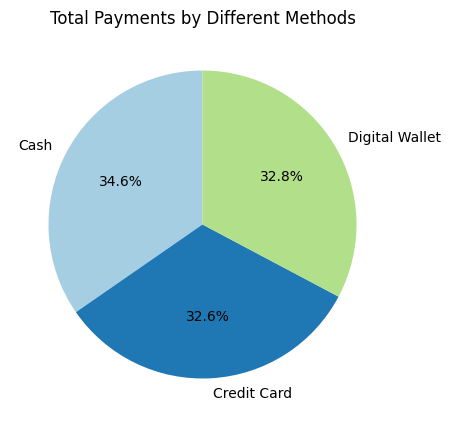

In [114]:
total_payments_by_diff_method = df.groupby('Payment Method')['Total Spent'].sum()
print(total_payments_by_diff_method)
plt.figure(figsize=(10, 5))
colors = plt.cm.Paired(range(len(total_payments_by_diff_method)))
plt.pie(total_payments_by_diff_method, labels=total_payments_by_diff_method.index, autopct='%1.1f%%', colors=colors, startangle=90)
plt.title('Total Payments by Different Methods')
plt.show()

Location
Online      831145.0
In-store    805050.5
Name: Total Spent, dtype: float64


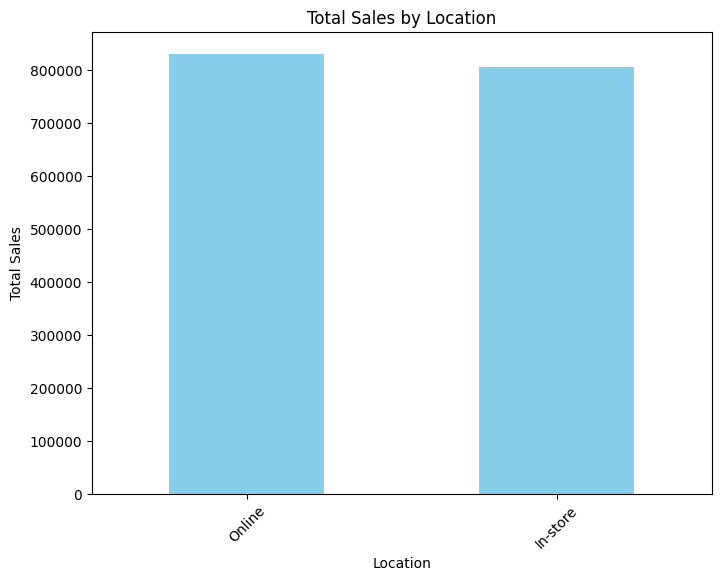

In [115]:
total_sales_by_location = df.groupby('Location')['Total Spent'].sum().sort_values(ascending=False)
print(total_sales_by_location)
plt.figure(figsize=(8, 6))
total_sales_by_location.plot(kind='bar', color='skyblue')
plt.title('Total Sales by Location')
plt.xlabel('Location')
plt.ylabel('Total Sales')
plt.xticks(rotation=45)
plt.show()

Category
Patisserie                            8465.0
Butchers                              8638.0
Computers and electric accessories    8758.0
Electric household essentials         8759.0
Milk Products                         8765.0
Beverages                             8784.0
Furniture                             8858.0
Food                                  8873.0
Name: Quantity, dtype: float64


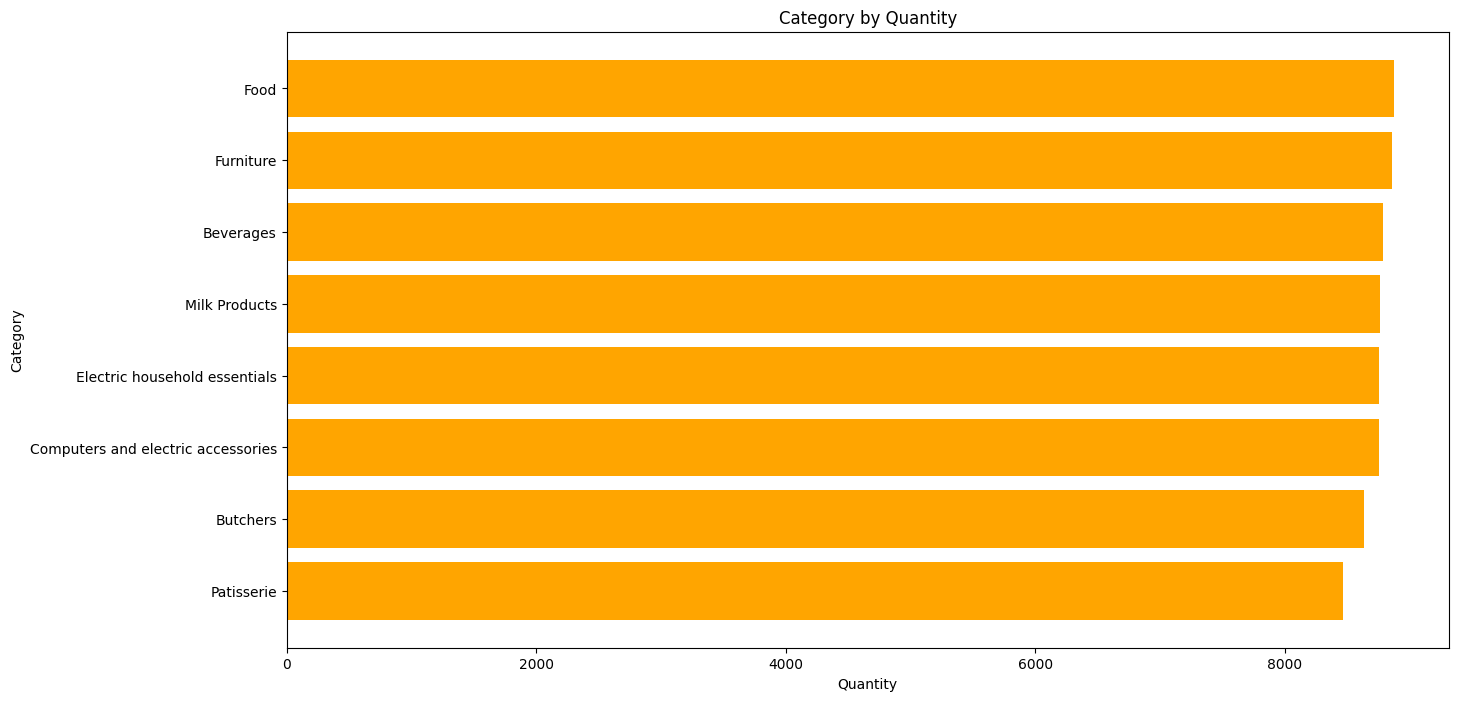

In [116]:
category_by_quantity = df.groupby('Category')['Quantity'].sum().sort_values(ascending=True)
print(category_by_quantity)
plt.figure(figsize=(15, 8))
plt.barh(category_by_quantity.index, category_by_quantity.values, color = "orange")
plt.title('Category by Quantity')
plt.xlabel('Quantity')
plt.ylabel('Category')
plt.show()

Discount Applied
False    8356
True     4219
Name: Customer ID, dtype: int64


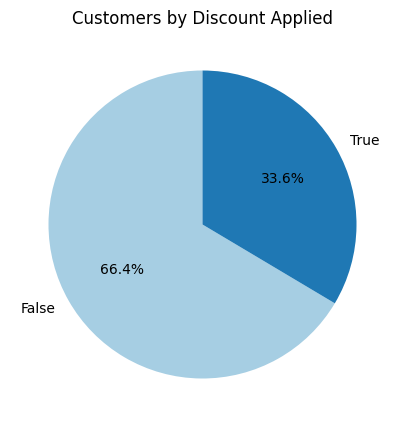

In [117]:
customer_applied_discount = df.groupby('Discount Applied')['Customer ID'].count()
print(customer_applied_discount)
plt.figure(figsize=(10, 5))
colors = plt.cm.Paired(range(len(customer_applied_discount)))
plt.pie(customer_applied_discount, labels=customer_applied_discount.index, autopct='%1.1f%%', colors=colors, startangle=90)
plt.title('Customers by Discount Applied')
plt.show()

Month       1        2        3        4        5        6        7        8   \
Year                                                                            
2022   55886.0  45764.5  43072.0  42494.0  42012.5  44568.0  47438.5  43342.0   
2023   49039.5  41343.0  41264.5  41178.0  42183.0  44151.0  48331.0  39853.5   
2024   51309.0  40118.0  45654.5  48477.5  47410.0  47457.0  43211.0  45684.0   
2025   27033.5      NaN      NaN      NaN      NaN      NaN      NaN      NaN   

Month       9        10       11       12  
Year                                       
2022   47693.0  40246.5  45548.0  41073.5  
2023   43032.5  40435.5  38970.0  45340.0  
2024   43493.5  45082.5  46117.5  50887.5  
2025       NaN      NaN      NaN      NaN  


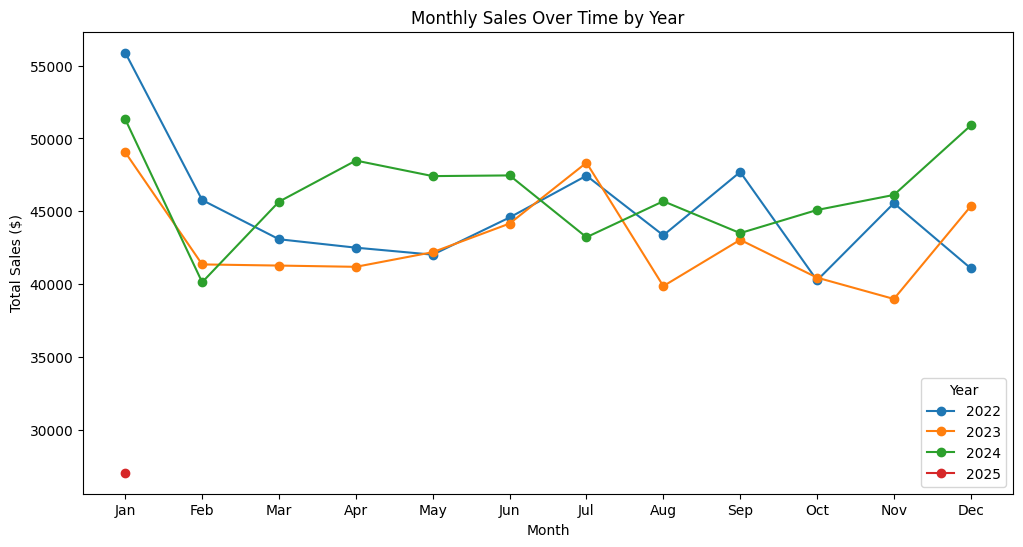

In [118]:
df['Year'] = df['Transaction Date'].dt.year  
df['Month'] = df['Transaction Date'].dt.month  
monthly_sales = df.groupby(['Year', 'Month'])['Total Spent'].sum().unstack()
print(monthly_sales)
plt.figure(figsize=(12, 6))
for year in monthly_sales.index:
    plt.plot(monthly_sales.columns, monthly_sales.loc[year], marker='o', linestyle='-', label=year)
plt.xlabel("Month")
plt.ylabel("Total Sales ($)")
plt.title("Monthly Sales Over Time by Year")
plt.xticks(ticks=range(1, 13), labels=["Jan", "Feb", "Mar", "Apr", "May", "Jun", "Jul", "Aug", "Sep", "Oct", "Nov", "Dec"])
plt.legend(title="Year")
plt.show()

Payment Method                         Cash  Credit Card  Digital Wallet
Category                                                                
Beverages                           73788.0      64120.0         68709.5
Butchers                            74912.0      76638.0         65847.0
Computers and electric accessories  72542.0      66952.5         62859.0
Electric household essentials       70709.5      63242.5         79449.5
Food                                73980.5      66414.5         65289.0
Furniture                           70194.5      68370.0         66759.5
Milk Products                       64082.0      63946.5         62849.0
Patisserie                          66607.5      63684.0         64249.0


<Figure size 1200x800 with 0 Axes>

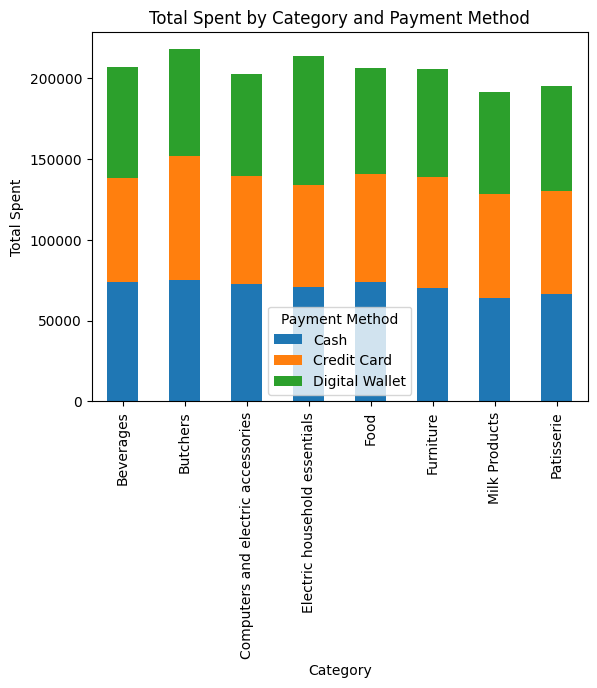

In [119]:
category_payment_total = df.groupby(['Category', 'Payment Method'])['Total Spent'].sum().unstack()
print(category_payment_total)
plt.figure(figsize=(12, 8))
category_payment_total.plot(kind='bar', stacked=True)
plt.title('Total Spent by Category and Payment Method')
plt.xlabel('Category')
plt.ylabel('Total Spent')
plt.xticks(rotation=90)
plt.legend(title='Payment Method')
plt.show()

Location                             In-store     Online
Category                                                
Beverages                           23.344231  23.257306
Butchers                            24.662628  25.364796
Computers and electric accessories  23.037241  23.241297
Electric household essentials       24.278497  24.353480
Food                                22.911209  23.266373
Furniture                           23.735149  22.950192
Milk Products                       21.390013  21.621059
Patisserie                          23.019557  23.108410


<Figure size 1200x800 with 0 Axes>

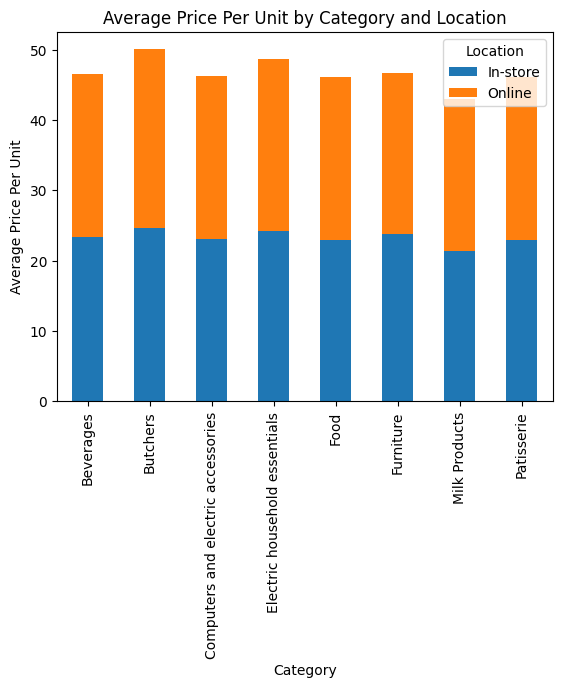

In [120]:
category_price_location = df.groupby(['Category', 'Location'])['Price Per Unit'].mean().unstack()
print(category_price_location)
plt.figure(figsize=(12, 8))
category_price_location.plot(kind='bar', stacked=True)
plt.title('Average Price Per Unit by Category and Location')
plt.xlabel('Category')
plt.ylabel('Average Price Per Unit')
plt.xticks(rotation=90)
plt.legend(title='Location')
plt.show()

Category
Butchers                              25.167516
Electric household essentials         24.363683
Beverages                             23.522029
Food                                  23.180886
Furniture                             23.179499
Computers and electric accessories    23.104990
Patisserie                            22.981748
Milk Products                         21.777239
dtype: float64


C:\Users\rudra\AppData\Local\Temp\ipykernel_17644\1364135741.py:1: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  avg_price_per_unit = df.groupby('Category').apply(lambda x: (x['Total Spent'].sum() / x['Quantity'].sum())).sort_values(ascending=False)


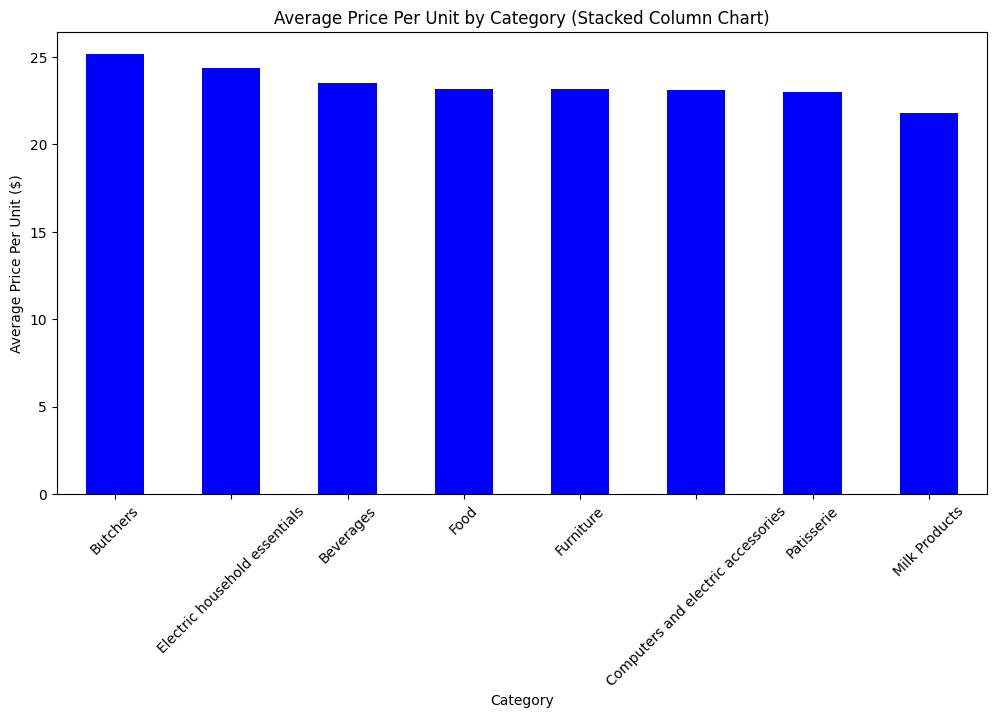

In [130]:
avg_price_per_unit = df.groupby('Category').apply(lambda x: (x['Total Spent'].sum() / x['Quantity'].sum())).sort_values(ascending=False)
print(avg_price_per_unit)
plt.figure(figsize=(12, 6))
avg_price_per_unit.plot(kind='bar', stacked=True, color='blue')
plt.xlabel("Category")
plt.ylabel("Average Price Per Unit ($)")
plt.title("Average Price Per Unit by Category (Stacked Column Chart)")
plt.xticks(rotation=45)
plt.show()